확률 분포 = 동전의 앞 뒤를 0.1로 정하면 0,1은 확률변수가 되고  
그 변수의 확률은 1/2씩 나온다. 그 1/2가 확률 분포에 해당한다

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

## 판다스 내장 그래프 도구
- 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포트하지 않고 간단히 그래프 그릴 수 있음.
- 선 그래프 : df.plot()메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 선 그래프를 그림.
- 막대 그래프 : df.plot(kind='bar'), df.plot(kind='barh',stacked=True,alpha=0.8)
- 히스토그램 : df.plot(kind='hist')
- 산점도 : df.plot(x='',y='',kind='scatter') 상관관계를 볼 수 있음.
- 박스 플롯 : df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공

## matplotlib
- histogram : plt.hist(x,bins=)
- line plot : plt.plot(x,y)
- plt.bar(x,y,width=, color='')
- scatter plot : plt.scatter(x,y):

# seaborn
- sns.distplot(data, bins=,color=,kde=), histplot, displot으로 변경
- sns.boxplot(x,y,data,color)
- sns.violinplot(x,y,data,color)
- sns.barplot(x,y,data,color)
- sns.joinplot(x,y,data,color)
- sns.pairplot(data,hue,palette)
- sns.implot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/주가데이터.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [5]:
df['NDate'] = pd.to_datetime(df['Date'])
df1 = df.set_index('NDate')
df1.drop(['Date','Volume'],axis=1,inplace=True)
df1.head()

,Close,Start,High,Low
NDate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


<AxesSubplot:xlabel='NDate'>

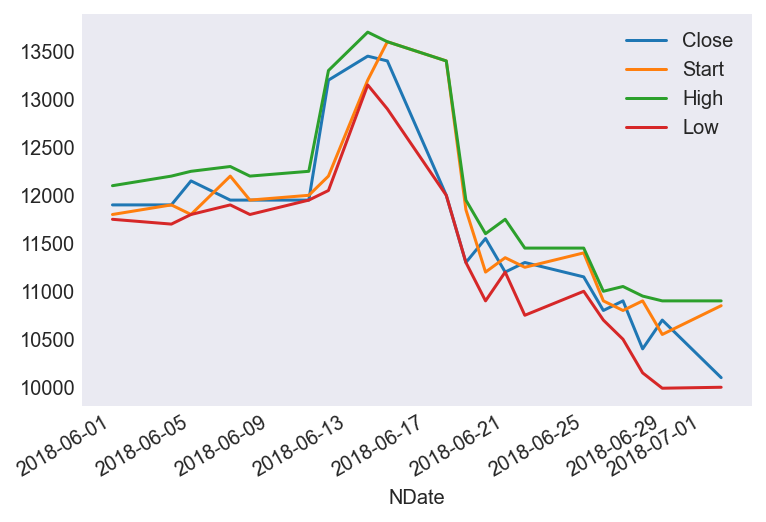

In [6]:
# 선 그래프
df1.plot()
# 우측 상단에 범례가 있음 / 날짜데이터로 변환하면 알아서 인식해서 오름차순으로 정렬

<AxesSubplot:xlabel='NDate'>

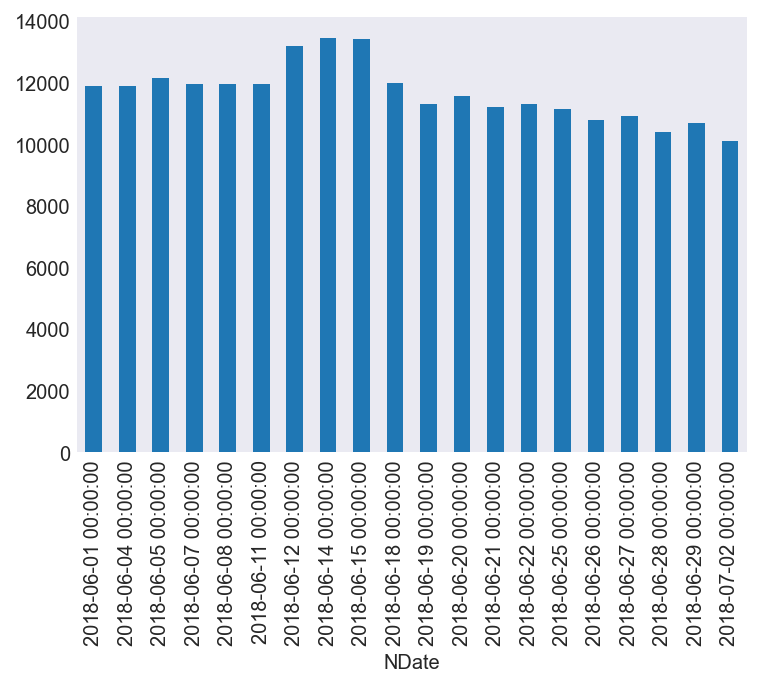

In [7]:
# 막대 그래프
df1.Close[::-1].plot(kind='bar') # [::-1]로 역순으로 전환

<AxesSubplot:xlabel='NDate'>

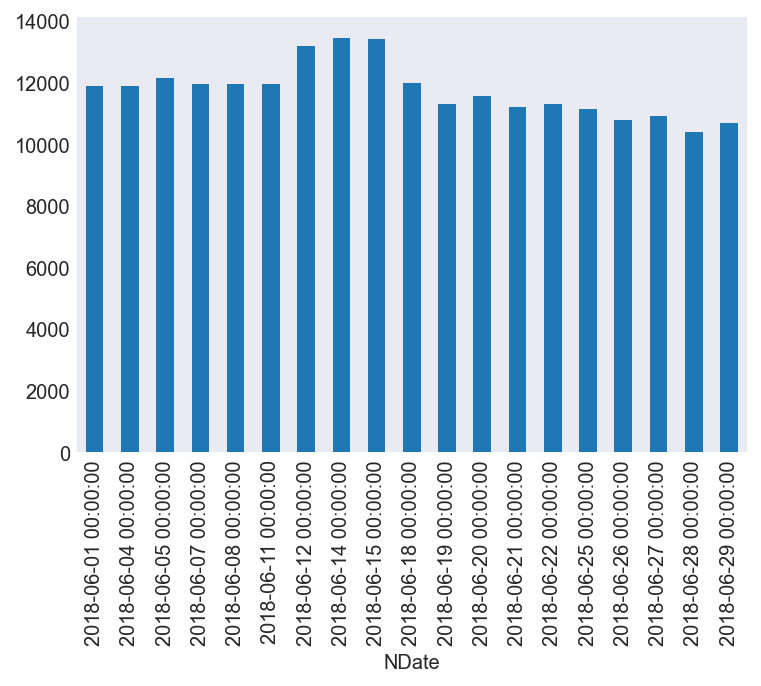

In [8]:
# 6월만 추출해서 Close 칼럼으로 일별 막대 그래프를 표현하세요
# df1.Close['2018-06'][::-1].plot(kind='bar')
df1.loc['2018-06','Close'][::-1].plot(kind='bar')

In [9]:
df1.Close.value_counts()

11950    3
11300    2
11900    2
10100    1
10700    1
10400    1
10900    1
10800    1
11150    1
11200    1
11550    1
12000    1
13400    1
13450    1
13200    1
12150    1
Name: Close, dtype: int64

<AxesSubplot:ylabel='Frequency'>

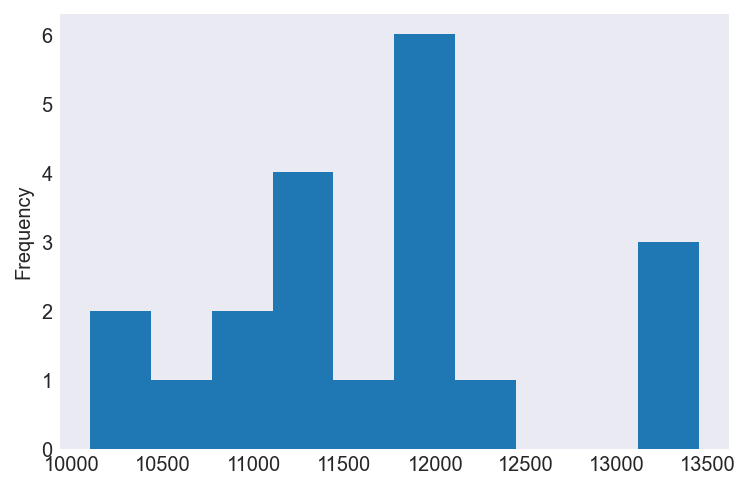

In [10]:
# Close 칼럼을 히스토그램으로 표현
df1.Close.plot(kind='hist',bins=10)

<AxesSubplot:ylabel='Frequency'>

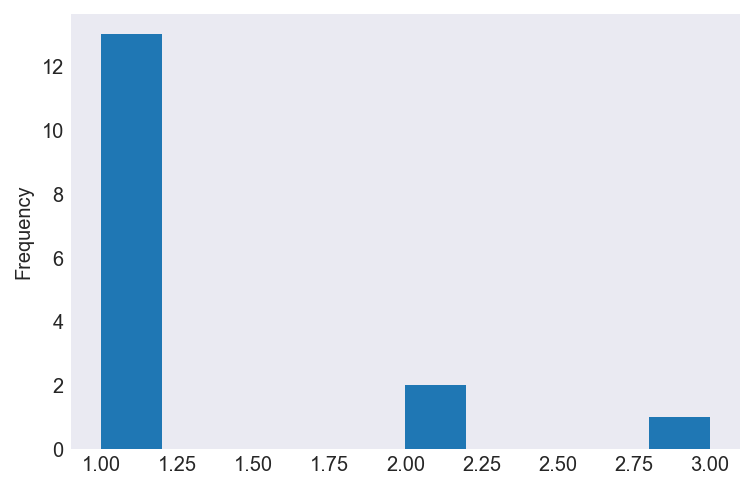

In [11]:
df1.Close.value_counts().plot(kind='hist') # Close 컬럼의 원소들을 히스토그램으로 표현

<AxesSubplot:ylabel='Frequency'>

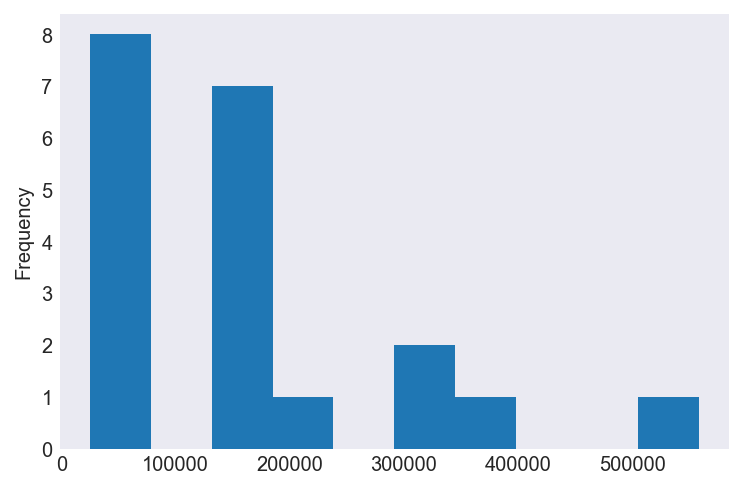

In [12]:
df.Volume.plot(kind='hist')

<AxesSubplot:xlabel='Close', ylabel='Volume'>

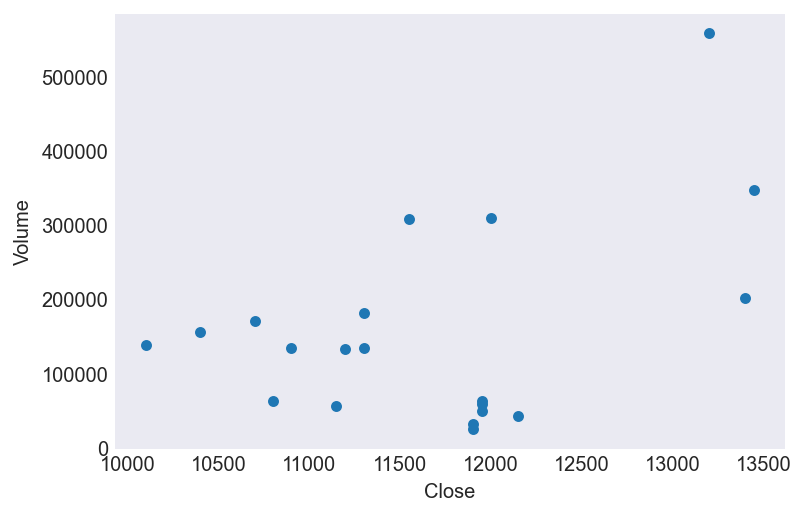

In [13]:
# Close 칼럼과 Volume 칼럼으로 산점도를 표현하세요.
df.plot(x='Close',y='Volume',kind='scatter')

<AxesSubplot:>

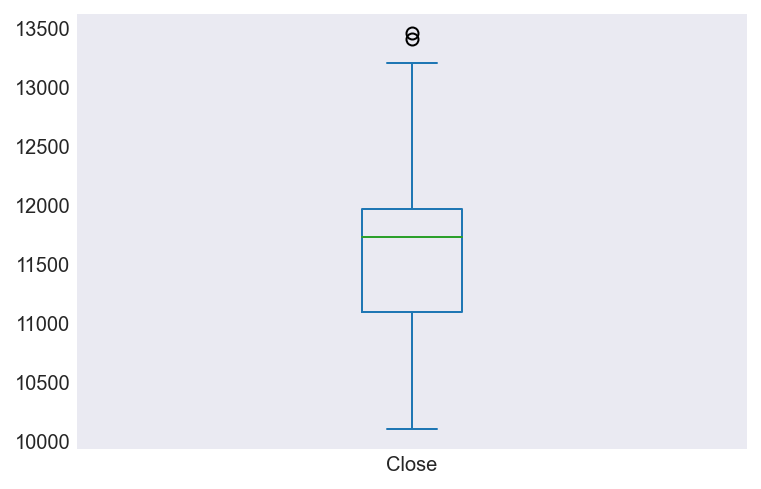

In [14]:
# Close 칼럼의 Boxplot을 표현하세요.
df.Close.plot(kind='box')
#df.boxplot(column = ['Close'])

In [15]:
df.Close.describe()
# upper = 11962.5 + iqr*1.5
# lower = 11087.5 - iqr*1.5
# iqr = 11962.5-11087.5
# iqr = Interquartile range

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

### Box plot 의미해석
- 중앙값
- IQR(Inter Quartile Range): 제 3사분위수 - 제 1사분위수
- lower whisker : Q1 - 1.5 * IQR 이내인 값중에서 최솟값
- upper whisker : Q3 + 1.5 * IQR 이내인 값중에서 최댓값
- 이상치 : lower whisker, upper whisker를 벗어나는 값
- 이내는 해당 값을 포함하지 않음

In [16]:
# Close 컬럼의 이상치를 구하세요.
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
이상치 = df.Close[(df['Close']<=(Q1-IQR*1.5))|(df['Close']>=(Q3+IQR*1.5))]
이상치

11    13400
12    13450
Name: Close, dtype: int64

In [17]:
s1 = df.Close.describe()['25%']
s3 = df.Close.describe()['75%']
IQR = s3 - s1
ds = df[(df['Close']<=(s1-IQR*1.5)) | (df['Close']>=(s3+IQR*1.5))]
ds

,Date,Close,Start,High,Low,Volume,NDate
11,2018-06-15,13400,13600,13600,12900,201376,2018-06-15
12,2018-06-14,13450,13200,13700,13150,347451,2018-06-14


In [18]:
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
outlier = []
for i in df.Close:
    if not Q1 - IQR*1.5 < i < Q3 + IQR*1.5:
        outlier.append(i)
print(outlier)

[13400, 13450]


11    13600
Name: Start, dtype: int64

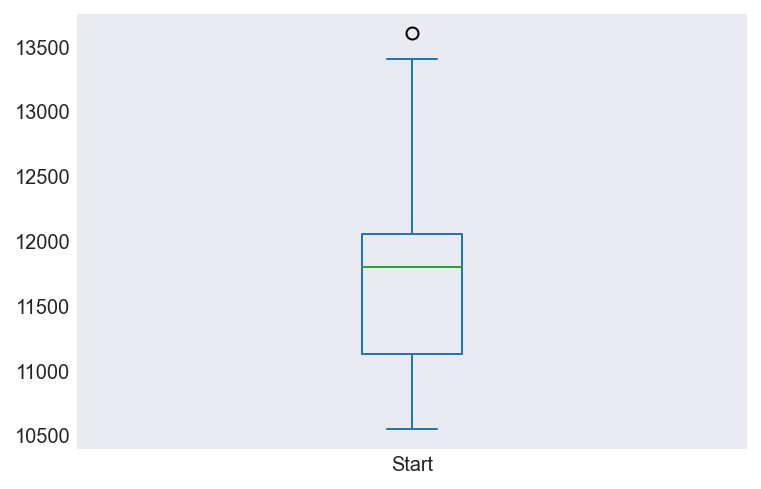

In [19]:
# 과제 
# Start 컬럼의 분포 및 이상치 여부를 탐색하는 Box Plot 및 이상치를 구하세요.
df.Start.plot(kind='box')
q1 = df.Start.describe()['25%']
q3 = df.Start.describe()['75%']

iqr = q3 - q1
df.Start[(df['Start'] <= (q1 - 1.5 * iqr)) | (df['Start'] >= (q3 + 1.5 * iqr))]

In [20]:
df_ep = pd.read_excel('dataset/df_ep.xlsx')
df_ep.head()

,year,south,north
0,1990,1077,277
1,1991,1186,263
2,1992,1310,247
3,1993,1444,221
4,1994,1650,231


In [21]:
df_ep.set_index('year',inplace=True)


<AxesSubplot:xlabel='year'>

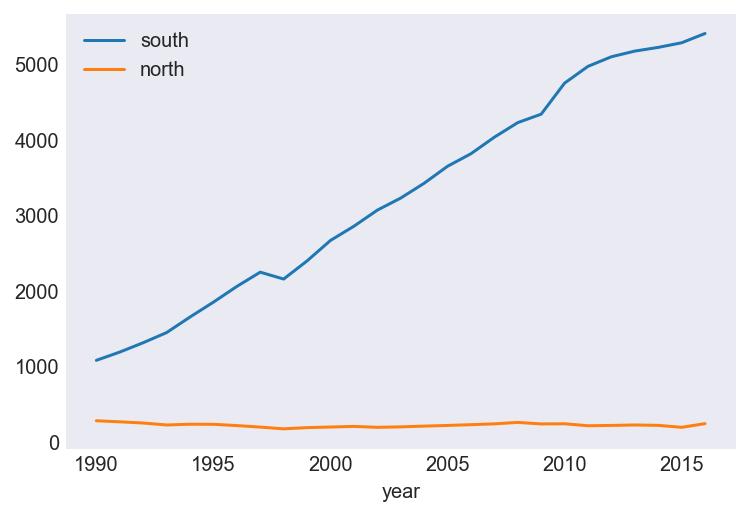

In [22]:
df_ep.plot()

<AxesSubplot:xlabel='year'>

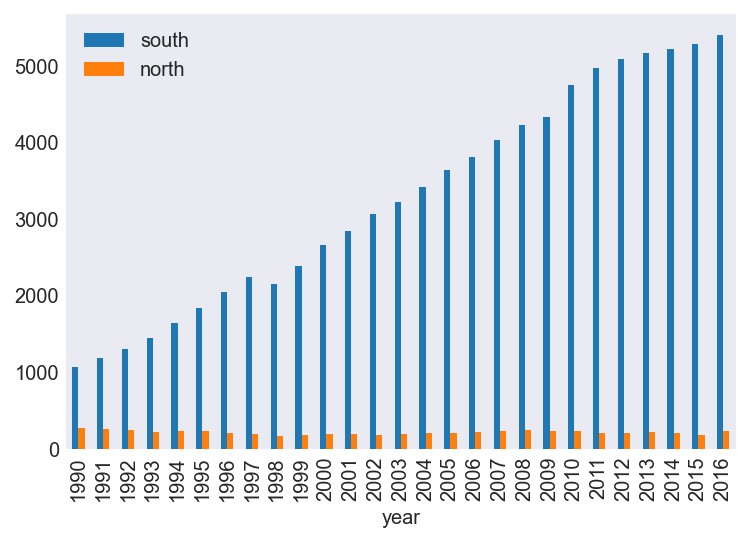

In [23]:
df_ep.plot(kind='bar')

<AxesSubplot:>

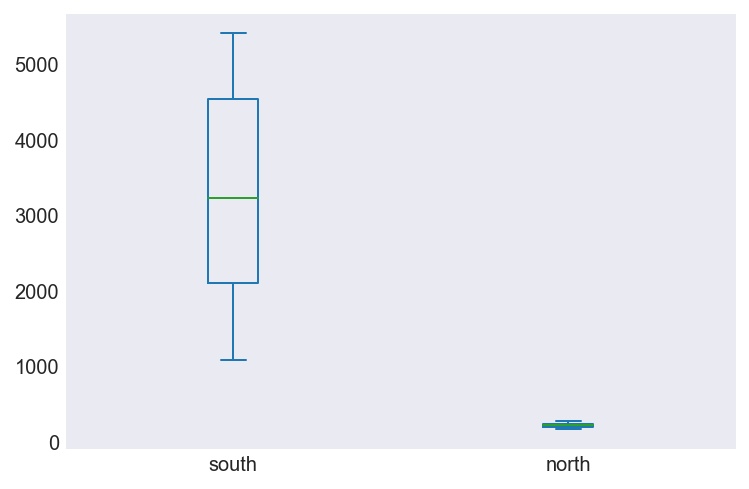

In [24]:
df_ep.plot(kind='box')

<AxesSubplot:xlabel='year'>

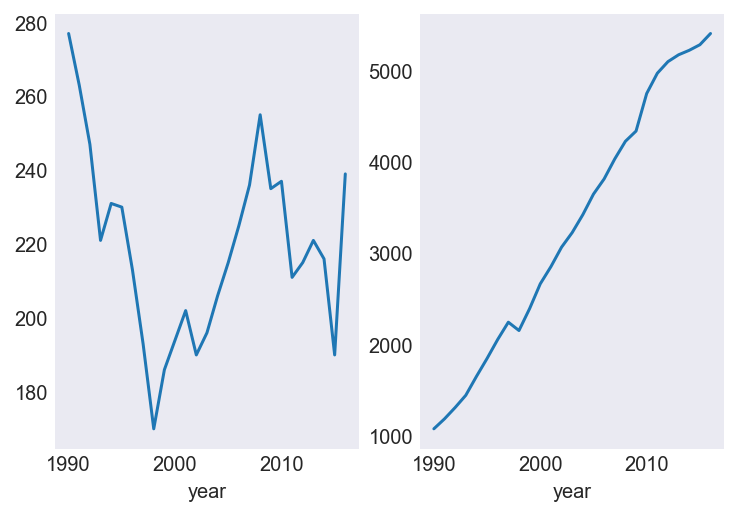

In [50]:
plt.subplot(1,2,1)
df_ep['north'].plot()
plt.subplot(1,2,2)
df_ep['south'].plot()

In [25]:
# 과제
# 남북한 발전량 데이터를 시각적으로 탐색하고 그 특징을 요약 기술하세요.
# 북한은 발전량 범위가 280이내에서 이루어진다
# 남한은 특정 이벤트가 있었던 시기에 발전량이 크게 증감했다(1998 : IMF / 2009 : 신종플루)
# 위기로 인해 발전량이 내려가면 극복하면서 크게 반등한다
# 남,북한의 발전량의 차이는 점점 갈수록 크게 벌어진다
# 남한의 lower whisker가 북한의 upper whisker랑 한참 차이난다


In [26]:
import pandas as pd
df_auto = pd.read_excel('dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [27]:
# 과제
# df_auto의 각 컬럼을 시각화 해서 탐색한 후 인사이트를 기술하세요 (5개 이상)

<AxesSubplot:>

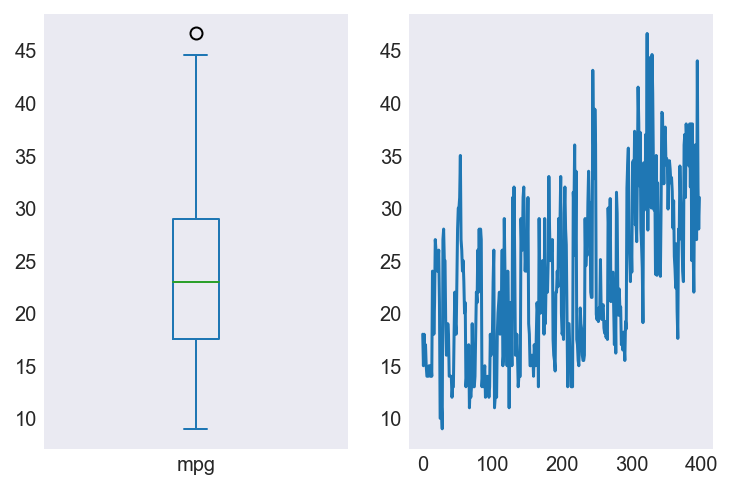

In [52]:
# mpg 컬럼의 평균은 하향 평준화 되어있다
plt.subplot(1,2,1)
df_auto['mpg'].plot(kind='box')
plt.subplot(1,2,2)
df_auto['mpg'].plot()

<AxesSubplot:>

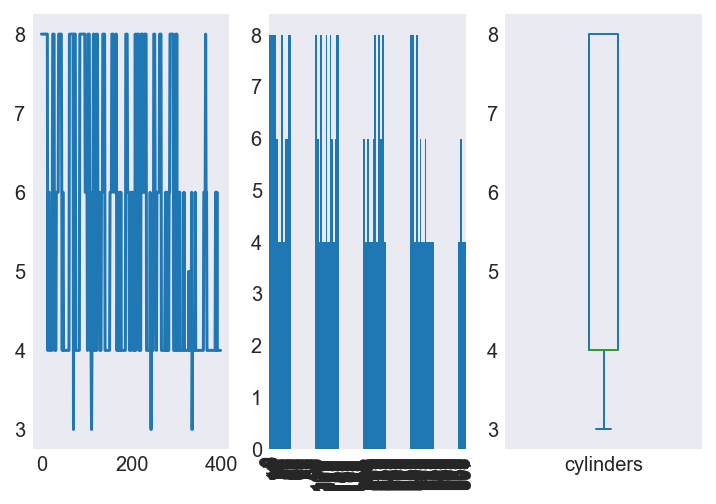

In [70]:
df_auto.cylinders.plot(kind='bar')
# 실린더의 갯 수는 대부분 짝수로 떨어진다.
plt.subplot(1,3,1)
df_auto['cylinders'].plot()
plt.subplot(1,3,2)
df_auto['cylinders'].plot(kind='bar')
plt.subplot(1,3,3)
df_auto['cylinders'].plot(kind='box')

<AxesSubplot:>

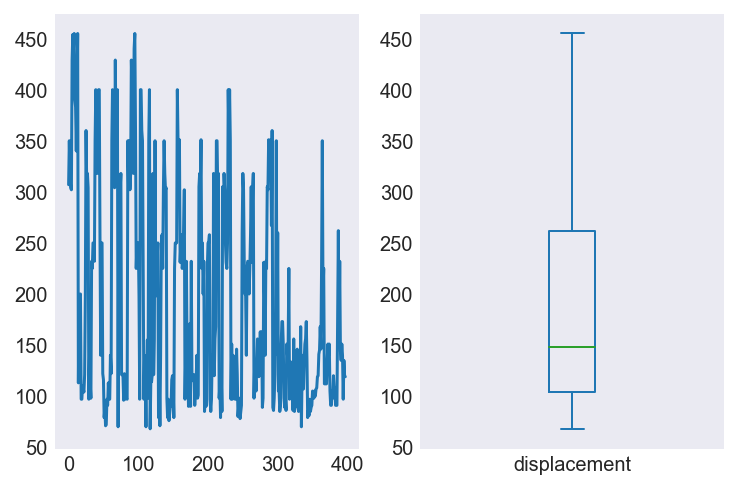

In [72]:
plt.subplot(1,2,1)
df_auto.displacement.plot()
plt.subplot(1,2,2)
df_auto.displacement.plot(kind='box')

In [43]:
# mpg 컬럼의 이상치를 구하세요.
a1 = df_auto.mpg.describe()['25%']
a3 = df_auto.mpg.describe()['75%']
iqr = a3 - a1

df_auto.mpg[((df_auto['mpg']<=(a1 - 1.5 * iqr)) | (df_auto['mpg']>=(a3 + 1.5 * iqr)))]

322    46.6
Name: mpg, dtype: float64

In [74]:
# 이상치 구하는 사용자 함수
def adv(value):
    q1 = value.describe()['25%']
    q3 = value.describe()['75%']
    iqr = q3 - q1

    result = value[((value<=(q1 - 1.5 * iqr)) | (value>=(q3 + 1.5 * iqr)))]
    return result

j = adv(df_auto['mpg'])
j

322    46.6
Name: mpg, dtype: float64

In [29]:
# 과제
# 통계학의 기초 개념을 설명하세요.
# 1. 모수의 개념 및 예
# 2. 통계량의 개념 및 예
# 3. 확률변수, 확률, 확률분포
# 4. 도수, 도수분표, 상대도수
# 5. 평균값, 기대값, 분산, 표준편차
# 6. 확률질량함수, 확률밀도함수
# 7. 정규분포, 이항분포, 포아송분포
# 8. 표본분산(n), 불편분산(n-1)
# 9. 기술통계, 추측통계
# 10. 가설과 검정